In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.patheffects as path_effects

import ipywidgets as widgets
from IPython.display import display


In [23]:
data = pd.read_csv('../../data/avito_clean.csv')
df = data.copy()

#df = df.dropna()
df = df[df['type_annonce'] == 'à vendre']
df = df.drop_duplicates(subset=['lien'])

print(f"{len(df)} annonces.")


1234 annonces.


## ------------------------ Basic data analysis --------------------------

In [24]:
mean_mile = np.mean(df['kilometrage'].dropna())
print("Kilométrage moyen des voitures annonés: " ,round(mean_mile), 'Km')
mean_mile = df['kilometrage'].median()
print("Kilométrage médian: " ,round(mean_mile), 'Km')

mean_price = df['prix'].dropna().median()
print("Prix moyen du marché : ", round(mean_price), "DH")

mean_year = np.mean(df['annee'].dropna())
print("Ages moyen des voitures dans le marché: ", 2026 - round(mean_year))

Kilométrage moyen des voitures annonés:  104932 Km
Kilométrage médian:  95001 Km
Prix moyen du marché :  193000 DH
Ages moyen des voitures dans le marché:  7


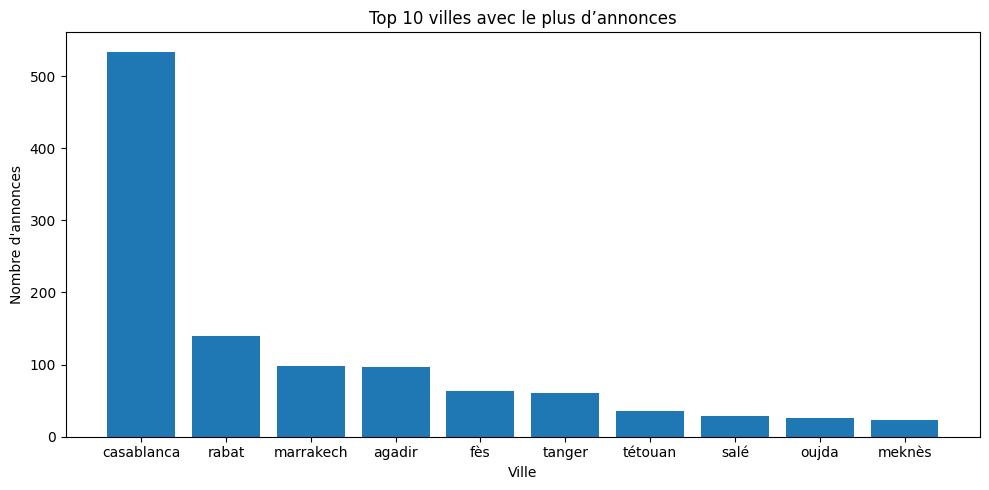

In [25]:
top_cities = (df['ville'].value_counts().head(10).reset_index())

top_cities.columns = ['ville', 'nombre_annoces']

plt.figure(figsize=(10, 5))

plt.bar(top_cities['ville'], top_cities['nombre_annoces'])
plt.title('Top 10 villes avec le plus d’annonces')
plt.xlabel('Ville')
plt.ylabel("Nombre d'annonces")
plt.tight_layout()
plt.show()


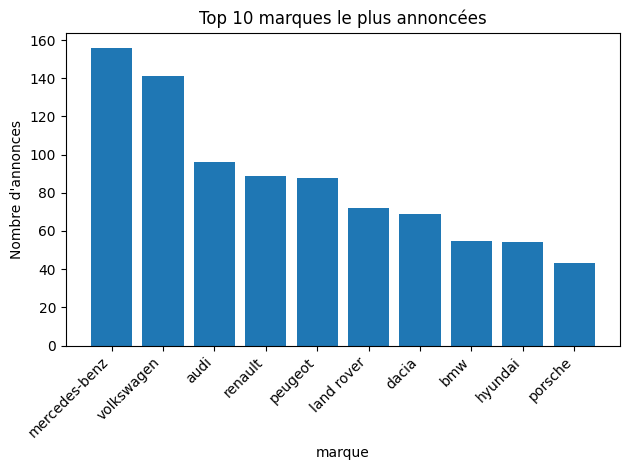

In [26]:
top_brands = (df['marque'].dropna().value_counts().head(10).reset_index())
top_brands.columns = ['marque', 'nombre_annoces']

plt.bar(top_brands['marque'], top_brands['nombre_annoces'], width=0.8)

plt.title('Top 10 marques le plus annoncées')
plt.xlabel('marque')
plt.ylabel("Nombre d'annonces")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

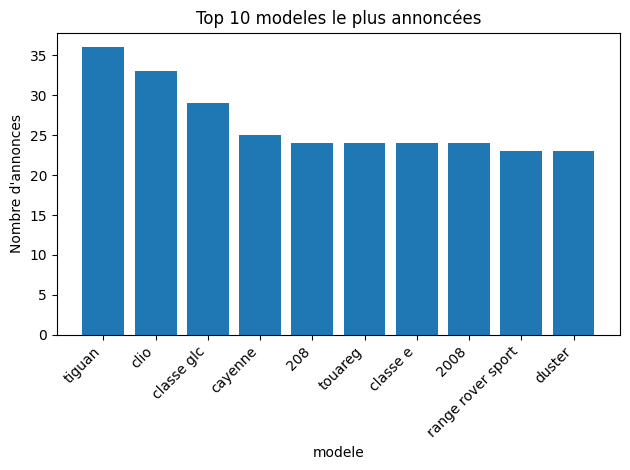

In [27]:
top_brands = (df['modele'].dropna().value_counts().head(10).reset_index())

top_brands.columns = ['modele', 'nombre_annoces']

plt.bar(top_brands['modele'], top_brands['nombre_annoces'], width=0.8)

plt.title('Top 10 modeles le plus annoncées')
plt.xlabel('modele')
plt.ylabel("Nombre d'annonces")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

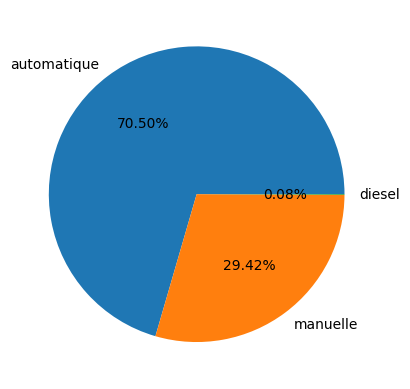

In [28]:
transmissions = (df['transmission'].dropna().value_counts().reset_index())
transmissions.columns = ['transmission', 'nombre']

plt.pie(transmissions['nombre'], labels=transmissions['transmission'], autopct='%1.2f%%')
plt.show()

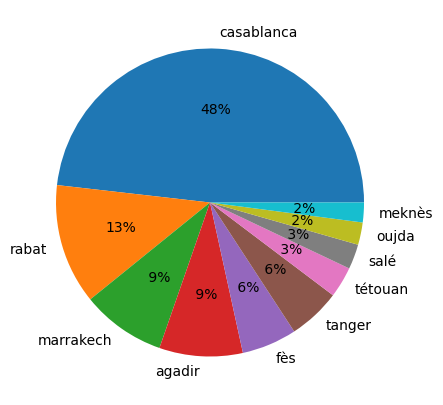

In [29]:
top_cities = (df['ville'].dropna().value_counts().head(10).reset_index())

top_cities.columns = ['ville', 'nombre_annoces']

plt.figure(figsize=(10, 5))
plt.pie(top_cities['nombre_annoces'], labels = top_cities['ville'], autopct='%2.f%%')
plt.show()

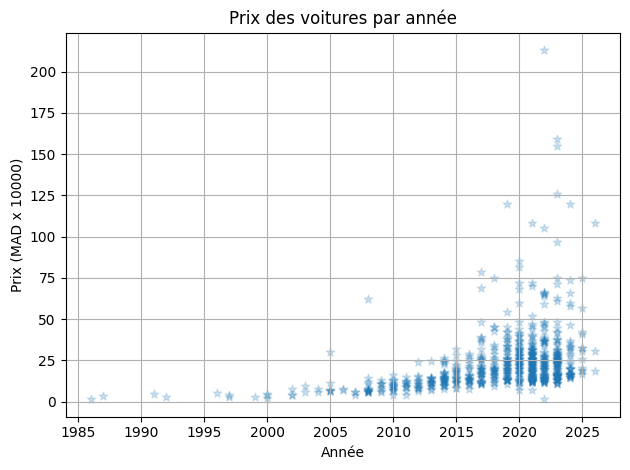

In [30]:
price_year = (df.dropna(subset=['prix', 'annee']))

plt.scatter(price_year['annee'], price_year['prix'] / 10000, s=40, alpha=0.2, marker='*')
plt.title('Prix des voitures par année')
plt.xlabel('Année')
plt.ylabel('Prix (MAD x 10000)')
plt.grid(True)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))
plt.tight_layout()
plt.show()


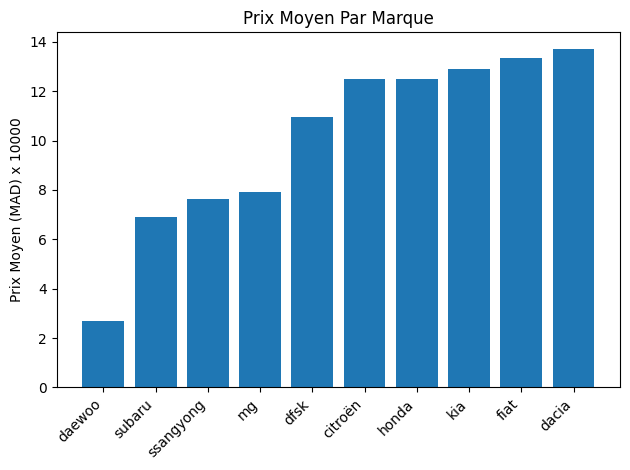

In [31]:
brand_av_price = df.dropna(subset=['prix', 'marque']).groupby('marque')['prix'].median().sort_values(ascending=True).head(10)

plt.bar(brand_av_price.index, brand_av_price.values / 10000)
plt.xticks(rotation=45, ha='right')
plt.title('Prix Moyen Par Marque')
plt.ylabel('Prix Moyen (MAD) x 10000')
plt.tight_layout()
plt.show()

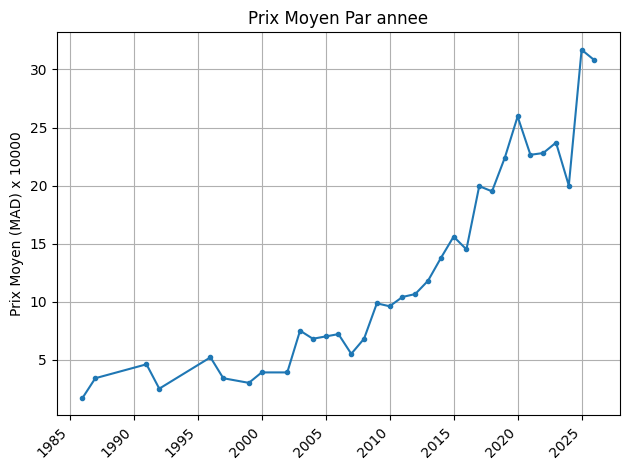

In [32]:
brand_av_price = df.dropna(subset=['prix', 'annee']).groupby('annee')['prix'].median()

plt.plot(brand_av_price.index, brand_av_price.values / 10000, marker=".")
plt.xticks(rotation=45, ha='right')
plt.title('Prix Moyen Par annee')
plt.ylabel('Prix Moyen (MAD) x 10000')
plt.tight_layout()
plt.grid(True)
plt.show()

In [33]:
model_price_year = df.dropna(subset=['marque', 'modele', 'prix', 'annee']).groupby(['marque', 'modele', 'annee'])['prix'].median()

brands = sorted(df['marque'].dropna().unique())

def get_models(brand):
    return sorted(df[df['marque'] == brand]['modele'].dropna().unique())

def plot_model(brand, model):
    try:
        model_data = model_price_year.loc[brand, model]
        plt.plot(model_data.index, model_data.values / 10000, marker='o')
        plt.title(f'Evolution du prix moyen - {model.upper()}')
        plt.xlabel('Année')
        plt.ylabel('Prix moyen (MAD) x 10000')
        plt.show()
    except KeyError:
        print("Pas de données pour ce modèle.")

brand_dropdown = widgets.Dropdown(
    options=brands,
    description='Marque:'
)
model_dropdown = widgets.Dropdown(
    description='Modèle:'
)

def update_models(*args):
    model_dropdown.options = get_models(brand_dropdown.value)

brand_dropdown.observe(update_models, names='value')
update_models()

widgets.interact(plot_model ,brand = brand_dropdown, model=model_dropdown)

interactive(children=(Dropdown(description='Marque:', options=('abarth', 'alfa romeo', 'audi', 'bentley', 'bmw…

<function __main__.plot_model(brand, model)>